# **UCL Data Science Society; Hackathon 2020**

## *Data Science for Good - Kiva Crowdfunding*

*Gaurav Mehan*


## **Preface** 

Data Science has always had a defined role in fintech - **use data science to better understand how the finance of others can be managed** and/or grown, such as risk analysis and investments. 
However, many established banking corporations have slowly been setting up thinktanks to rather use their **finance**, **technology** and **expertise** to do some **good**.

In a world where accountability must be **transparent**, *corporate social responisiblty (csr)* has become a greater factor in customer satisfaction and rather an essential part of any business.

*Kiva* is an **not--for-profit online crowdfunding platform** to extend financial services to poor and financially excluded people around the world. Kiva's mission is '*to expand financial access to help underserved communities thrive*'.

 It is often a difficult task for lenders to assses loan applications and choose what projects to fund, and how much to give. It is imperative to understand the level of poverty among communities across the globe, and knowing which people to help as such to help the most people, much like a *'domino effect'*. 

As such, creating a **Machine Learning** (ML) model that can perfectly achieve this is out of my scope and quite frankly difficult. 
However, I do intend on using Kiva's open source data [1] on loan applications to aid lenders in one feature - the **amount of funding to give**, that will depend on successful and unsuccessful loan applications, as well as a measure of the amount of poverty in communities, which is assessed using the *Multidimensional Poverty Index* (MPI) [2]. This will be achieved via simple ML model. 
Please note that the measure of poverty in the MPI has it's own definitions and is based in itself on a number of features outlined in their report. 

*American Express* are already familiar with this concept with their '*Shop Small*' initiaitve. They are already encouraging their customers, and indeed all consumers, to **support local businesses** through spending and even cashback for their customers who spend at participating local businesses. 

However, with limited presence in many developing countries, it has been **difficult to support local businesses without a customer base**. 

Rather than encouraging consumers to support local businesses, perhaps a new business area can be set up to directly give customers the ability to use their finances to **invest in these deprived communities** with the goal of both increasing their own investments and **doing good deeds**. 
This is of course all part of a greater deal in which significant research would have to be undertaken by AMEX, which is why I propose this simply as an idea with a small example of how ML can be used in this way.

If you do have any questions then please feel free to contact me via my email: 
*zcapgme@ucl.ac.uk*



## ***Part I:*** **Data Analysis and Visualisation**

In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [134]:
#importing the data
loans = pd.read_csv('kiva_loans.csv') 
loc = pd.read_csv('kiva_mpi_region_locations.csv')

In [137]:
#remove any records with incomplete data
loans.dropna(inplace = True)
loc.dropna(inplace = True)

In [138]:
print('The number of loan applications is:', len(loans))

The number of loan applications is: 423081


In [ ]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01


A general overview of the data at hand can be seen from above. These hold specific data regarding the loan applications. 

It should be pointed out that ***funded_amount*** and ***loan_amount*** are in currency **USD**. 
Furthermore, ***sector*** has been described as a *'High Level category'* whereas ***activity*** a *'more granular category'* [1]

In [140]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

Of course the csv file contains a range of data types; some numerical, some catogorical, some string heavy. 

In [139]:
loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,4.230810e+05,423081.000000,423081.000000,423081.000000,423081.000000,423081.000000
mean,1.023395e+06,849.451819,849.451819,183.988165,14.183130,23.465814
std,1.919704e+05,1134.653980,1134.653980,99.563027,8.628768,30.701949
min,6.530470e+05,25.000000,25.000000,9.000000,2.000000,1.000000
25%,8.660230e+05,300.000000,300.000000,126.000000,8.000000,9.000000
50%,1.037726e+06,500.000000,500.000000,154.000000,14.000000,15.000000
75%,1.194290e+06,1000.000000,1000.000000,222.000000,14.000000,29.000000
max,1.339713e+06,100000.000000,100000.000000,535.000000,158.000000,2986.000000


From *.describe*, key bits of information that can be extracted are that the avergae loan given to applicants ['funded_amount'] is $ 849.45 $ $. This so happens to also be the case for the avergage amount of loan applied ['loan_amount']. This would point to a, near, 100% approval rate for loans. 

However, more likely the case, records with incomplete data have been removed which might account for this unlikely scenario in the real world. 
I will, however, be neglecting this fact as I will be focusing in the amount of loan to give to applicants, without knowing how much they applied for, as otherwise, the ML model will most likely give the exact amount asked for.

The point of this ML model is to rather suggest a value given other parameters to better understand the factors involved in the amount of loan given - for example, the use cases and location of the community where the loan has been applied for.

For example, it would pointless to give more money to a farmer than a retail business owner if rather it takes more money to run a retail store than it would a farm. This would also be the case giving the same money to all farmers in all countries when the cost of living also differs drastically.

In [ ]:
from collections import Counter

def CountObject(text, name, freq_num):
    """Take in an array of text, and count the frequency of the words
    """

    words = []
    #find unique words in text
    for i in  text:
        if i not in words:
            words.append(i)
    
    #count the frequency of the unique words
    freq = Counter(text)
    
    #store the most common words given by freq_num
    most_occur = freq.most_common(freq_num)
    most_occur = np.array(most_occur)

    words, freq = zip(*most_occur)

    frequency = []
    for i in range(0, len(freq)): 
        frequency.append(int(freq[i]))
    
    #plot a graph of the frequently used words
    plt.figure(figsize=(21,7))
    plt.barh(words, frequency, color = 'b')
    plt.xlabel('Frequency')
    plt.xticks()
    plt.ylabel(name)
    plt.show()

    return most_occur

*CountObject* is a function that calculates the frequency of a given entry for a specific feature, using basic **Natural Langual Processing** (NLP). The most common entries are then plotted in a bar chart.

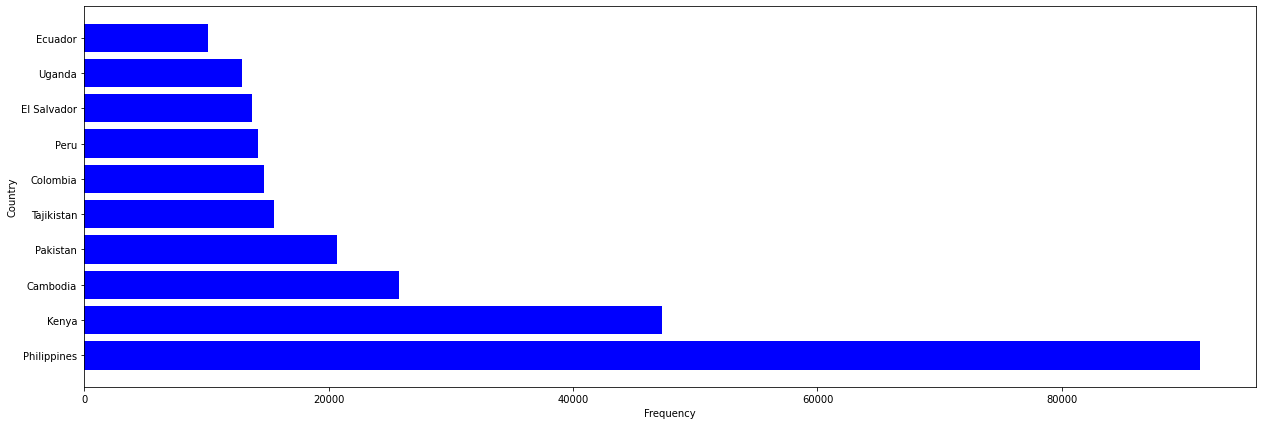

In [ ]:
country = loans["country"]
country_freq = CountObject(country, 'Country', 10)

Following a rather exponential pattern, the **Phillipines** contains the most funded projects. As a country with a large and mostly underdevolped population, this is understandable, especially considering the geography of its archipelagos and hard to reach communities. Though it seems, the top 10 countries are generally spread amongst the underdeveloped continents or sub-continents, that is; **Africa**, **South America**, and **the Middle East**. 

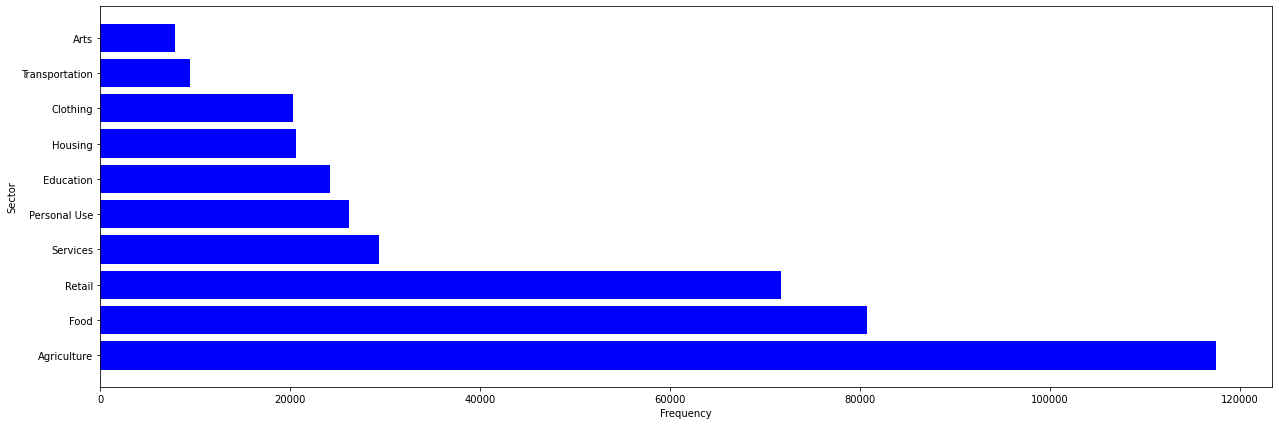

In [ ]:
sector = loans["sector"]
sector_freq = CountObject(sector, 'Sector', 10)

Understandably, **Agriculture** and **Food** are the two most largest funded sectors in these developing countries. Sustinence is a key first step to develpoing a community. Once a stable flow of nourishment is supplied, many other business can be established and a range of economic activites carried out. Moving forward with this, **Retail** is regarded as the most common and simple business to set up as it does not neccesarily require education, of which there is a lack of in develpoing countries, and can prosper with a reasonable amount of funding with less risk. It is apparent that loans for more complex businesses are far and few and thus only a product of a stablisied economy*.


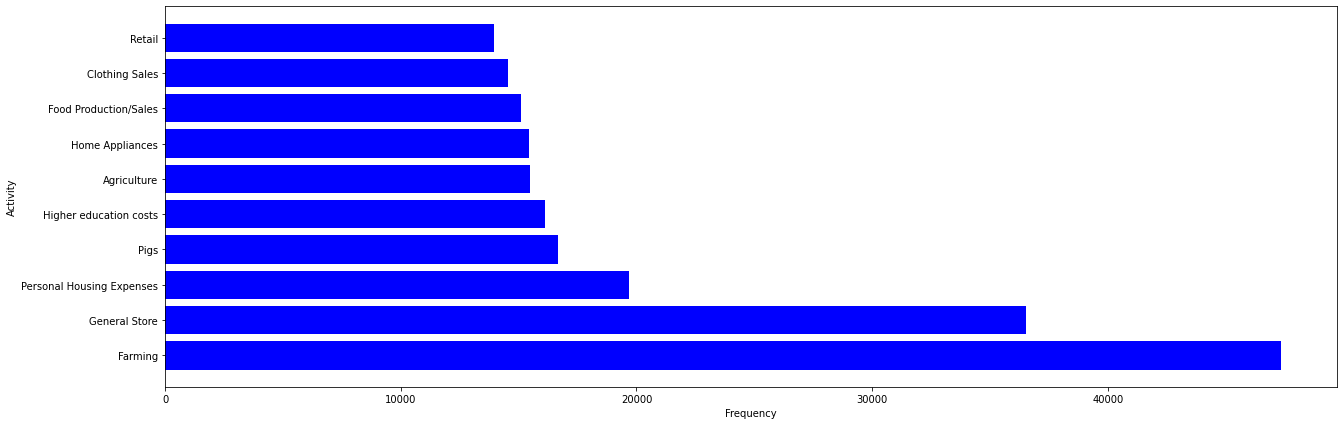

In [ ]:
activity = loans['activity']
activity_freq = CountObject(activity, 'Activity', 10)

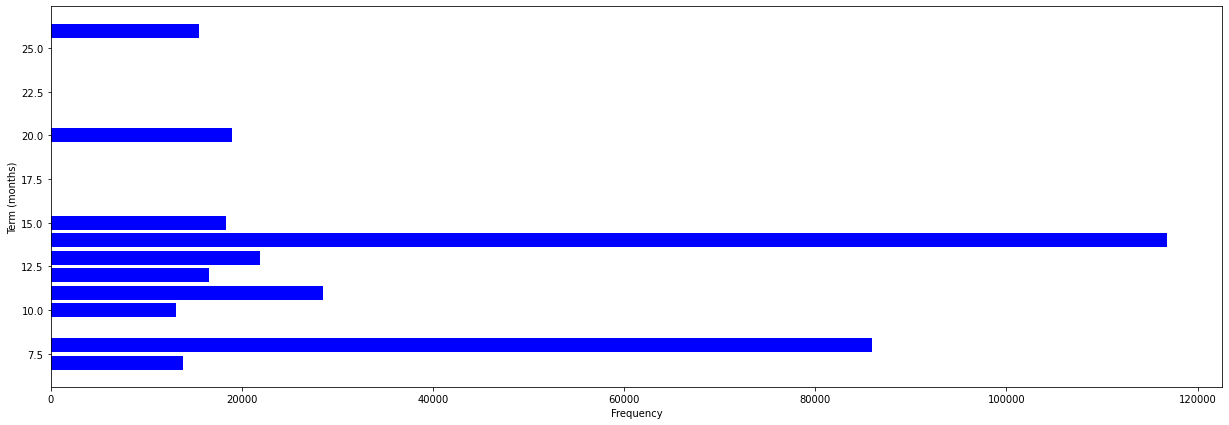

In [ ]:
term = loans["term_in_months"]
term_freq = CountObject(term, 'Term (months)', 10)

As you can see, there is no defined term of loan given to businesses starting up. Though the most common seem to be $ 8 $ and $ 14 $ months. *Short term is the norm*, as long term does not neccessarily guarentee a good return as the rate of growth of the local economy can go either way. If a business in a developing country was to prosper, it would have taken off rather rapidly. 

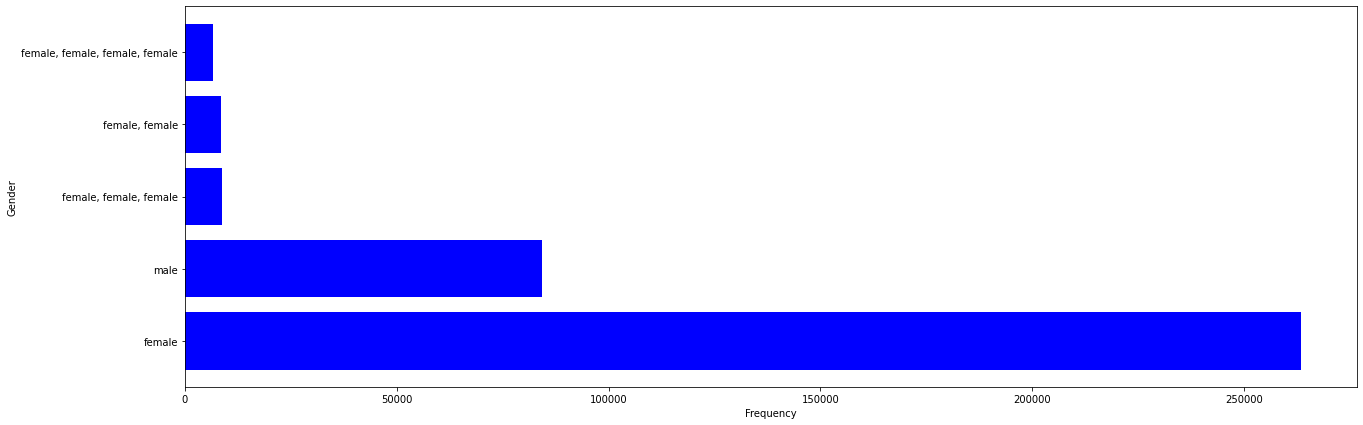

In [ ]:
gender = loans["borrower_genders"]
gender_freq = CountObject(gender, 'Gender', 5)

A **lone female** seems to be most common applicant of a loan. Given the position of women in many of these developing countries, it can be inferred that these women are solo businesswomen who most likely are married and are in search of, or forced to find a source of secondary income to suppotr the breadwinner of their household. For example, in $ 2017 $ and $ 2018 $, the **percentage change in marriages** recorded in the **Phillipines** increased from $ 3.6 $ and $ 3.3 $ [3], indicating that *marriage is quite still the norm*. This large female applicant base maybe due to lack of funding from family members who are reluctant to fund their women, in the eyes of their traditional norms and values. Men on the other hand are more likely to recieve funding from either local bodies, or family and friends, or inherit family-run businesses*. 

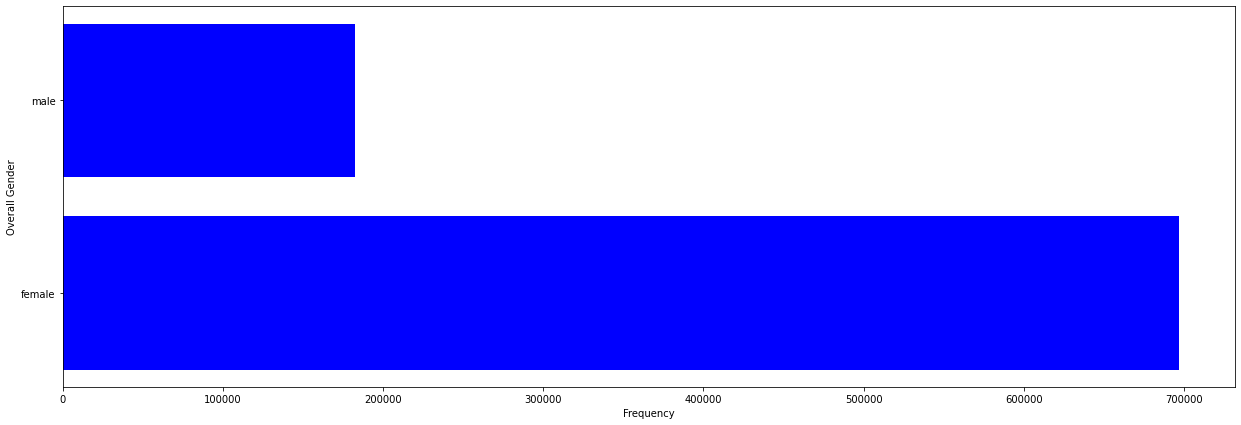

In [ ]:
gender_df = pd.DataFrame(gender)

gender_df = pd.DataFrame.squeeze(gender_df) #combine all records into one long string
total_gender = gender_df.str.cat(sep = ',') #seperate each entry from all records
total_gender = total_gender.replace(',', ' ') #remove all commas
total_gender = total_gender.split() #split all the words

total_gender_freq = CountObject(total_gender, 'Overall Gender', 10)

Further to this, I thought it would be interesting to **count the gender of all total applicants**, and just as with the **borrower_gender**, combined females make up a large proportion of applicants, whether it be solo or in a group.

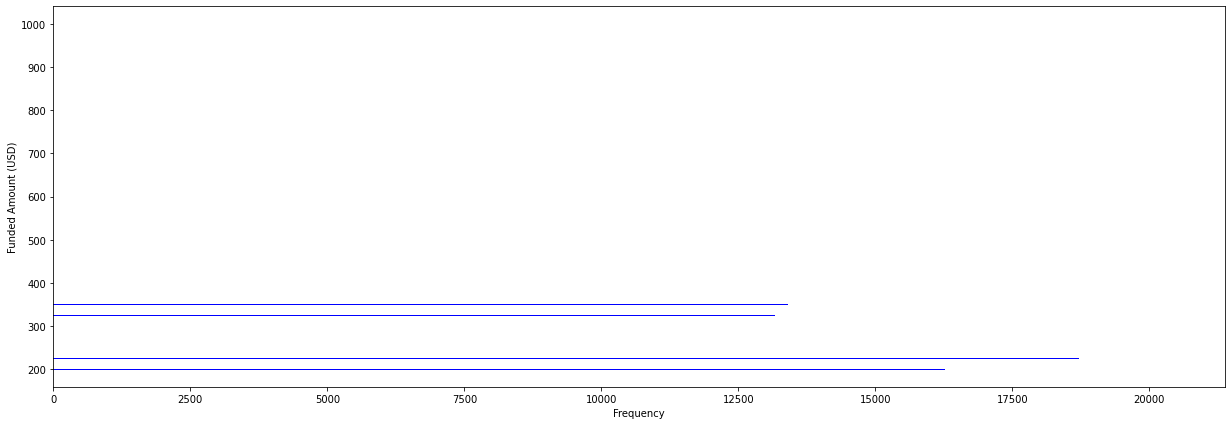

In [ ]:
funded_amount = loans["funded_amount"]
funded_amount_freq = CountObject(funded_amount, 'Funded Amount (USD)', 10)

As with the loan term, there is no favourite loan amount to give. However, loans given by lenders in developing countries are often a small fraction of wealth acquired. For example, in $ 2019 $, the *median wealth per adult* in the **United States** was $ 65,904 $ $ [5]. Of course this may be attributed to the lower cost of living in many developing countries. 

In [ ]:
unique_countries = []

#find all unique entries
for i in country:
    if i not in unique_countries:
        unique_countries.append(i)
    
print(unique_countries[:,10])
print('')
print('The number of countries for which we have loan applications is:', len(unique_countries))

['India', 'Pakistan', 'Kenya', 'Nicaragua', 'Tanzania', 'Peru', 'Liberia', 'Vietnam', 'Cambodia', 'Philippines', 'Honduras', 'Palestine', 'Mongolia', 'United States', 'Mali', 'Colombia', 'Tajikistan', 'El Salvador', 'Bolivia', 'Ecuador', 'Ghana', 'Yemen', 'Sierra Leone', 'Haiti', 'Chile', 'Senegal', 'Jordan', 'Burundi', 'Burkina Faso', 'Timor-Leste', 'Indonesia', 'Uganda', 'Georgia', 'Ukraine', 'Guatemala', 'Albania', 'Costa Rica', 'Somalia', 'Zimbabwe', 'Dominican Republic', 'Brazil', 'Mexico', 'Azerbaijan', 'Cameroon', 'Kyrgyzstan', 'Armenia', 'The Democratic Republic of the Congo', 'Paraguay', 'Samoa', 'Israel', 'Nepal', 'Congo', 'Lebanon', 'Zambia', 'Mozambique', 'Turkey', 'South Africa', 'Togo', 'Belize', 'Rwanda', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania', 'Vanuatu', 'Panama', "Lao People's Democratic Republic", 'Myanmar (Burma)', 'Malawi', 'Saint Vincent and the Grenadines', 'Benin', 'Moldova', 'South Sudan', 'Solomon Islands', 'China', 'Egypt', 'Afghanistan', 'Madagascar'

Now that we have a list of countries in which loans have been given in, it might be interesting to count the total funding recieved by each country.

In [ ]:
country = loans['country']
funded_amount = loans['funded_amount']

country = country.tolist()
funded_amount = funded_amount.tolist()

total_funding_per_country = []

#count the total number of funding recieved by each country
for i in range(0,len(unique_countries)):
    total_amount = 0
    for j in range(0, len(country)):
        if unique_countries[i] == country[j]:
            total_amount = total_amount + funded_amount[j]
    total_funding_per_country.append(total_amount)
    

In [ ]:
total_funding_countries = list(zip(unique_countries, total_funding_per_country))

In [ ]:
def takeSecond(elem):
  """ return the second element 
  """
    return elem[1]

#sort the countries by funding in descending order
total_funding_countries.sort(reverse = True, key = takeSecond)

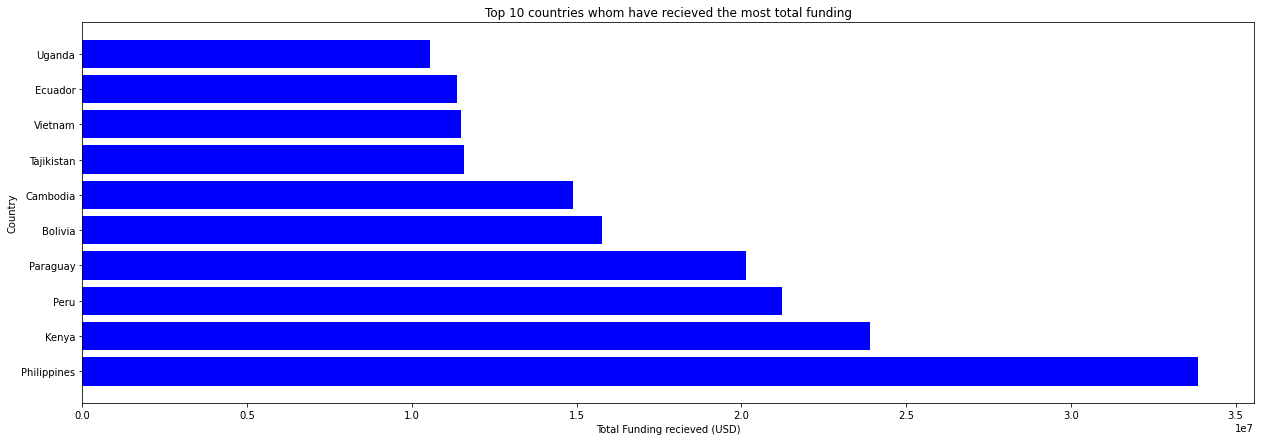

In [142]:
top_10_funded_countries = total_funding_countries[:10] #take the top 10 funded countries

x, y = zip(*top_10_funded_countries)

plt.figure(figsize = (21,7))
plt.barh(x, y, color = 'b') 
plt.xlabel('Total Funding recieved (USD)')
plt.xticks()
plt.ylabel('Country')
plt.title('Top 10 countries whom have recieved the most total funding')
plt.show()
         

As with the total number of loan applications, the **Phillipines** also has the highest total funding.

Further to this, it might be more interesting to calculate the *total funding per capita* given that, for example, the **Phillipines** has a high population [4] which may attribute to having a higher total funding, and the most number of applications, rather than something specific.

In [ ]:
world_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv', skiprows = 3) # [4]

world_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [ ]:
country_WB = world_population['Country Name']
population_WB_2018 = world_population['2018'] #take the figures for 2018 [as that was when the datasets from Kiva became available]


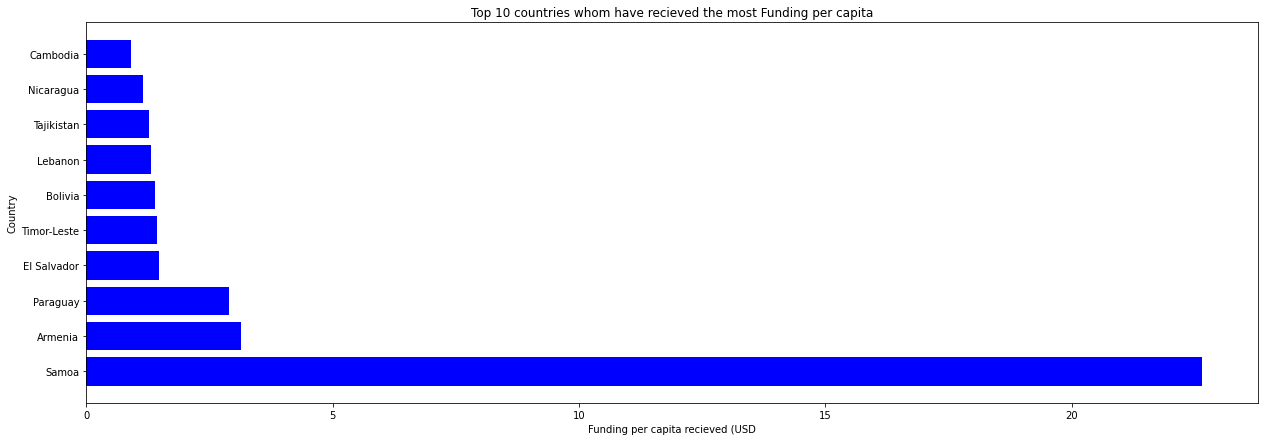

In [141]:
population = []

countries_funded_desc, funding = zip(*total_funding_countries)

#match the countries in which loans have been applied in to their population and their total funding
for i in range(0, len(countries_funded_desc)):
    for j in range(0, len(world_population)):
        if countries_funded_desc[i] == country_WB[j]:
            population.append([countries_funded_desc[i], population_WB_2018[j], funding[i]])

country_funding, population_funding, funding = zip(*population)

#calculate the total funding per capita
funding_per_capita = np.divide(funding, population_funding)
country_funding_per_capita = list(zip(country_funding, funding_per_capita))

#sort the countries in descending order
country_funding_per_capita.sort(reverse = True, key = takeSecond)

#take the top 10 funded countries per capita
top_10_funded_countries_per_capita = country_funding_per_capita[:10]

x, y = zip(*top_10_funded_countries_per_capita)

#plot this on a bar chart
plt.figure(figsize = (21,7))
plt.barh(x, y, color = 'b') 
plt.xlabel('Funding per capita recieved (USD')
plt.xticks()
plt.ylabel('Country')
plt.title('Top 10 countries whom have recieved the most Funding per capita')
plt.show()


Now it is quite apparent that the countries whom recieved the most total funding did not also recieve the highest funding per capita, as with **Gross Domestic Product** (GDP). 
**Samoa**, a tiny nation in the pacific, has an extremely high total funding per capita. This maybe because as an isolated nation, its population is bound to remain low due to high cost of imports. As a result, any projects to achieve sustainable business on the island would need significantly more funding, perhaps.

In [ ]:
loc.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


Along with the loan applications, we also have been given the **Multidimensional Poverty Index** ['MPI'], which as the name suggest is a measure of poverty, as well as the coordinates of the regions in which loans have been applied. 


In [148]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(30,15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='lightgrey',lake_color='white', zorder = 1)

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
plt.title("Locations of Kiva Crowfunded projects")

longitude = loc['lon'].tolist()
latitude = loc['lat'].tolist()
MPI = loc['MPI'].tolist()

x, y = m(longitude, latitude)

m.scatter(x, y, c=MPI, cmap= 'Blues', alpha=0.5, zorder = 10)

plt.colorbar(label=r'Multidimesional Poverty Index')

plt.show()

ModuleNotFoundError: ignored

This graph shows the locations of all the regions for which we have the MPI for, as well as visually, the MPI for each of these regions. 

Most applicants reside between the two tropics, and the greatest concentration of applicants seems to be in central Africa. Not surprisingly, central Africa also has some of the highest Multidimensional Poverty Index rates.


It would be ideal to match each loan application to the MPI associated with the region as this surely would affect the amount of funding given to a loan applicant.
However, given other datasets provided by Kiva that should've allowed this to occur, I found a problem with the environment in which the relational databases were set up, most notably, that there was not a one-to-one relationship between the local location where the loans were applied and their associated MPI.
And so as a compromise, I have calculated the *average MPI for each country* in the hope that it will provide a generalised metric to assessing the poverty in each nation. 

In [ ]:
unique_countries_loc = []

country_loc = loc['country'].tolist()

#count the unique countries in the loc dataset
for i in country_loc:
    if i not in unique_countries_loc:
        unique_countries_loc.append(i)
    
print(unique_countries_loc)
print('')
print('The number of countries whose MPI we have is:', len(unique_countries_loc))

['Afghanistan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh', 'Belize', 'Bolivia, Plurinational State of', 'Brazil', 'Bhutan', 'Central African Republic', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Democratic Republic of the', 'Congo, Republic of', 'Colombia', 'Comoros', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Guatemala', 'Guyana', 'Honduras', 'Haiti', 'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Cambodia', "Lao People's Democratic Republic", 'Liberia', 'Lesotho', 'Morocco', 'Madagascar', 'Mali', 'Myanmar', 'Mongolia', 'Mozambique', 'Mauritania', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua', 'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Rwanda', 'Sudan', 'Senegal', 'Sierra Leone', 'El Salvador', 'South Sudan', 'Sao Tome and Principe', 'Suriname', 'Swaziland', 'Syrian Arab Republic', 'Chad', 'Togo', 'Tajikistan', 'Timor-Leste', 'Trinidad and Tobago', 'Tanzania, United Republic of', 'Ug

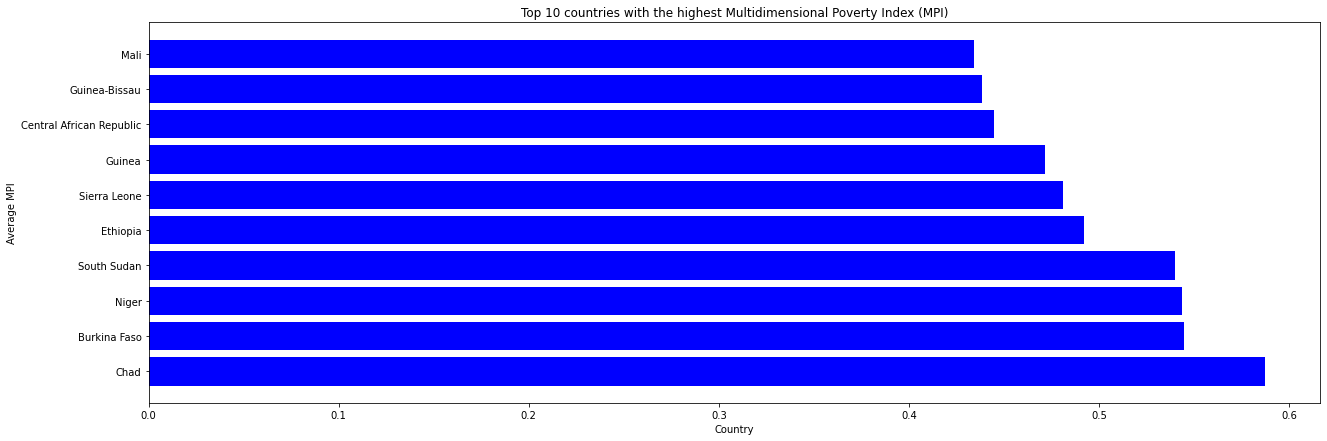

In [ ]:
country_loc = loc['country'].tolist()
MPI = loc['MPI'].tolist()

average_MPI = []

#count the total MPI for all regions in a given country and divide by the number of regions to obtain the average MPI for each country
for i in range(0, len(unique_countries_loc)):
    total_MPI = 0
    number_of_regions = 0
    for j in range(0, len(country_loc)):
        if unique_countries_loc[i] == country_loc[j]:
            total_MPI = total_MPI + MPI[j]
            number_of_regions = number_of_regions + 1
    average_MPI_for_that_country = total_MPI/number_of_regions
    average_MPI.append([unique_countries_loc[i], average_MPI_for_that_country])

#sort the average MPI in descending order
average_MPI.sort(reverse = True, key = takeSecond)

#take the top 10 most deprived nations
top_10_MPIs = average_MPI[:10]

x, y = zip(*top_10_MPIs)

#plot this data on a bar chart
plt.figure(figsize = (21,7))
plt.barh(x, y, color = 'b') 
plt.xlabel('Country')
plt.xticks()
plt.ylabel('Average MPI')
plt.title('Top 10 countries with the highest Multidimensional Poverty Index (MPI)')
plt.show()


The generalised metric is that **the higher the MPI, the greater the impoverishment** in that nation. As such, most of the most impoverished nations are located in the central African sub-continent, near the equator. 

In [ ]:
#create a placeholder for values for which the MPI will be inserted into incase there are countries whose MPI we do not know
placeholder = np.full(len(loans), np.nan)

average_MPI_country, average_MPI_value = zip(*average_MPI)

#match the avergae MPI for each country to each loan application
for i in range(0, len(country)):
    for j in range(0, len(average_MPI)):
        if country[i] == average_MPI_country[j]:
            placeholder[i] = average_MPI_value[j]

print(len(placeholder))

423081


In [ ]:
#place the average MPI values into the loans dataset
loans['MPI'] = placeholder

In [ ]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,MPI
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,NaN
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,NaN
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,0.233167
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,0.233167
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01,0.233167


In [143]:
#remove countries, and subsequently loan applications, whose MPI we do not have
loans.dropna(inplace = True)
print('The number of loans we have know is', len(loans))

The number of loans we have know is 423081


Now we have completed some exploratory data analysis, it is now time to select features which most probably has a greater effect on the amount of funding given to each loan applicant. 
It is important to note that I have removed the **country** feature, which some of you may think is important, since the economic situation of a country and improve and just as well decline. To account for this, the **MPI** would be a better measure for identifying each country and ensure that the ML model is agile in responding to real world economic developments rather than fixating on the name of a country, and hence it's apparent non-changing economic situation.

Furthermore, I believe that **currency** would also help us to assess the economic situation when comparing *currency rates* relative to the base USD. The *cost of living*, would also be a deciding factor in the amount of funding given, however I did not have the time to implement either features. As an idea, I would've included the **Purchasing Power Parity** (PPP), which is a measure of the cost of goods in a given country.

In [ ]:
#drop these columns which, in my opinion, have little to no effect on the funding given to each loan applicant.
loans_clean = loans.drop(columns = ['loan_amount', 'country_code', 'country', 'region', 'currency', 'use', 'posted_time', 'disbursed_time', 'funded_time', 'tags', 'repayment_interval', 'date', 'partner_id'])

This is what we are left with:

In [ ]:
loans_clean.head()

,id,funded_amount,activity,sector,term_in_months,lender_count,borrower_genders,MPI
7,653078,400.0,Beauty Salon,Services,14.0,8,female,0.233167
8,653082,475.0,Manufacturing,Manufacturing,14.0,19,female,0.233167
12,653089,400.0,General Store,Retail,14.0,16,female,0.233167
16,653091,400.0,General Store,Retail,14.0,11,female,0.233167
19,653080,475.0,Beauty Salon,Services,14.0,18,female,0.233167


Of course, in order to run through a ML model, we must convert all features into numerical catogories. So, **activity**, **sector**, and **borrower_genders**.

In [ ]:
unique_activities = []

activity = loans_clean['activity'].tolist()

#find all the unique entries for activity
for i in activity:
    if i not in unique_activities:
        unique_activities.append(i)
        
print('The number of unique entries for activity is', len(unique_activities))

numbering_activities = list(range(len(unique_activities)))

activities_numbered = []

#replace each activity with an assigned number
for i in range(0,len(loans_clean)):
    for j in range(0,len(unique_activities)):
        if activity[i] == unique_activities[j]:
            activities_numbered.append(numbering_activities[j])
            

163
341767
341767


In [ ]:
#drop the activity feature and replace with the numerical activity feature
loans_clean = loans_clean.drop(columns = 'activity', axis = 1)
loans_clean['activity'] = activities_numbered


In [ ]:
unique_sector = []

sector = loans_clean['sector'].tolist()

#find all the unique entries for sector
for i in sector:
    if i not in unique_sector:
        unique_sector.append(i)
        
print('The number of unique entries for sector is', len(unique_sector))

numbering_sectors = list(range(len(unique_sector)))

sectors_numbered = []


#replace each sector with an assigned number
for i in range(0,len(loans_clean)):
    for j in range(0,len(unique_sector)):
        if sector[i] == unique_sector[j]:
            sectors_numbered.append(numbering_sectors[j])
            

15
341767
341767


In [ ]:
#drop the sector feature and replace with the numerical sector feature
loans_clean = loans_clean.drop(columns = 'sector', axis = 1)
loans_clean['sector'] = sectors_numbered


Now that **activity** and **sector** have been sorted, it's now time to turn to **borrower_genders**. The problem is that theoretically, the possibilities for the entries for this feature is endless as it lists all the gender of all the loan applicants. 
To simplify this, I will be counting the number of females and males in each loan application and simply stating the **dominant gender** as a sort of average. If the number of females equals the number of males, I have simply stated *'male'* as the dominant gender since it is apparent that human assessors have a positive bias towards men, unfortunately, as with many world languages, such as French, that label a group of equal men and women as being masculine, just to give an example.

In [ ]:
total_gender_count = []

#identifying alphabets that let us distinguish between male and female
identifying_alphabet = ['f', ',']

gender = loans_clean['borrower_genders'].tolist()

#count the letters f and , in each entry, the number of females = the count of the letter f, 
#the number of males = the count of the comma + 1 minus the count of the letter f
for i in range(0, len(loans_clean)):
    f_count = gender[i].count(identifying_alphabet[0])
    comma_count = gender[i].count(identifying_alphabet[1]) + 1
    m_count = abs(f_count-comma_count)
    total_gender_count.append([f_count, m_count])

dominating_gender = []

females, males = zip(*total_gender_count)

#tell us the dominant gender in each gender count
for i in range(0, len(total_gender_count)):
    if females[i] > males[i]:
        dominating_gender.append(0)
    else:
        dominating_gender.append(1)


The way in which we identify the genders and their count in each entry is rather dodgy, or I should say 'unpythonic' but nonetheless works.
The difference in the words 'female' and 'male' is the letter 'f' and 'e', but the last letter is always 'e'. So when going through a string, the number of females can be counted by counting the number of 'f's. Each applicant is seperated by a comma. The total number of applicants is equal to the number of commas plus one. And hence, with my GCSE Maths, the number of males is equal to the number of commas plus one minus the number of females.

Make sense? Good!

In [ ]:
#drop the borrower_genders feature and replace with the dominanting_gender feature
loans_clean = loans_clean.drop(columns = 'borrower_genders', axis = 1)
loans_clean['dominating_gender'] = dominating_gender


And finally we are left with this that we can pass through our ML model:

In [ ]:
loans_clean.head()

,id,funded_amount,term_in_months,lender_count,MPI,activity,sector,dominating_gender
7,653078,400.0,14.0,8,0.233167,0,0,0
8,653082,475.0,14.0,19,0.233167,1,1,0
12,653089,400.0,14.0,16,0.233167,2,2,0
16,653091,400.0,14.0,11,0.233167,2,2,0
19,653080,475.0,14.0,18,0.233167,0,0,0


Now, we need to split our data into a training and test set using the **split_data** function.

In [ ]:
from typing import TypeVar, List, Tuple
import random

X = TypeVar('X')    #generic type to represent a data point
Y = TypeVar('Y')    #generic type to represent ouput variables

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split data into fractions in a random order [prob, 1-prob]"""

    data = data[:]  #make a shallow copy
    random.shuffle(data)    #because shuffle modifies the list
    cut = int(len(data)*prob)   #use prob to find a cutoff
    
    return data[:cut], data[cut:]
    

I am going to assign 75% of the data to the training set and 25% to the test set.

In [ ]:
data_tr, data_te = split_data(loans_clean.values.tolist(), 0.75)

data_train = pd.DataFrame(data_tr, columns = ['id', 'funded_amount' , 'term_in_months', 'lender_count', 'MPI', 'activity', 'sector', 'dominating_gender'])
data_test = pd.DataFrame(data_te, columns = ['id', 'funded_amount' , 'term_in_months', 'lender_count', 'MPI', 'activity', 'sector', 'dominating_gender'])

print('The number of data records to train the model is:', len(data_train))
print('The number of data records to test the model is:', len(data_test))

The number of data records to train the model is: 256325
The number of data records to test the model is: 85442


In [ ]:
X_train = data_train.drop("funded_amount", axis=1)
Y_train = data_train["funded_amount"]
X_test  = data_test.drop("id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((256325, 7), (256325,), (85442, 7))

## ***Part II:*** **Implementing a Machine Learning model**

In [ ]:
#machine learning
from sklearn.ensemble import RandomForestRegressor
import math

From previous experience, a Random Forest is usually the best model to implement given the cotinugity in the **funded_amount** data.

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


98.36

And there we have it, with a confidence score of $ 98.36 $, I would consider this a decent outcome.

## **My Thoughts and Conclusions**

I believe that this project is very generalised and of course given more time, I would have done some more data analysis and tried to find out, with factual evidence, which features are most useful for predicting the amount of funding one should give to a loan applicant, or in general any business in a developing country.

This should merely serve as an example of what something like this could be with significant business acumen and expertise, as well as access to other resources. 

I would also like to point out that implementation of the **RandomForestRegressor** has been very basic, and as with anything, given more time, I would have also created a validation set to provide further insight into whether my model was overfitting or underfitting as well as calculate the realtive importance of each feature. As a note, I would have calculated a *Root-Mean-Square-Error* (RMSE) to provide a better metric in assessing the ML model, as opposed to the *Confidence score*. 


**I should point out that any inferences I make are a product of my own understanding and common sense. Any statements made are extremely generalised and serve the purpose of providing context and a generalised understanding to any readers.*

## **References**:

[1] https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding

[2] https://ophi.org.uk/multidimensional-poverty-index/#:~:text=The%20global%20Multidimensional%20Poverty%20Index,that%20a%20person%20faces%20simultaneously

[3] https://psa.gov.ph/content/marriages-philippines-2018

[4] https://data.worldbank.org/indicator/SP.POP.TOTL

[5] https://en.wikipedia.org/wiki/List_of_countries_by_wealth_per_adult
